
https://education.yandex.ru/handbook/ml/article/metricheskiye-metody
# k-ближайших соседей (k-nearest neighbors, KNN)

Из-за своих недостатков алгоритм очень неэффективен в задачах с большим количеством данных. 
Однако у него всё равно есть много применений в реальном мире. Приведём лишь некоторые из них:

- Рекомендательные системы. Если посмотреть на саму формулировку задачи «предложить пользователю что-то похожее 
на то, что он любит», то KNN прямо напрашивается в качестве решения. Несмотря на то что сейчас часто используются более совершенные алгоритмы, метод ближайших соседей всё равно применяется в качестве хорошего бейзлайна.
- Поиск семантически похожих документов. Если векторные представления близки друг к другу, то темы документов схожи.
- Поиск аномалий и выбросов. Из-за того что алгоритм запоминает обучающую выборку полностью, ему легко посмотреть, 
насколько целевой объект похож на все данные, которые он видел.
- Задача кредитного скоринга. Рейтинги двух людей, у которых примерно одинаковая зарплата,
схожие должности и кредитные истории, не должны сильно отличаться, поэтому KNN отлично подходит для решения такой задачи.



# метрические методы


С этим товаром смотрят

Оценка 0-10

Похожесть пользователей, то что понравилось одному, понравится и другому.

Учитывать средний рейтинг пользователей

Пользователь:
возраст, температура воздуха, население в городе

Товар:
Одежда 

In [2]:
geo = [
    {
        "name":"Иркутск",
        "people": 606369,
        "temperature": {
            "july": 21,
            "january": -15
        }
    },
    { 
        "name":"Братск",
        "people": 224071,
        "temperature": {
            "july": 22,
            "january": -19
        }
    },
    {
        "name":"Качуг",
        "people":6421,
        "temperature": {
            "july": 25,
            "january": -24
        }
    },
    {
        "name":"Еланцы",
        "people": 4488,
        "temperature": {
            "july": 19,
            "january": -17
        }
    },
    {
        "name": "Хужир",
        "people": 1350,
        "temperature": {
            "july": 22,
            "january": -17
        }
    },
    {
        "name":"Хомутово",
        "people": 15064,
        "temperature": {
            "july": 25,
            "january": -12
        }
    },
    {
        "name":"Коты",
        "people":598,
        "temperature": {
            "july": 17,
            "january": -15
        }
    },
    # {
    #     "name":"Москва",
    #     "people":13149803 ,
    #     "temperature": {
    #         "july": 26,
    #         "january": -8
    #     }
    # }
    
]

In [3]:
import matplotlib.pyplot as plt

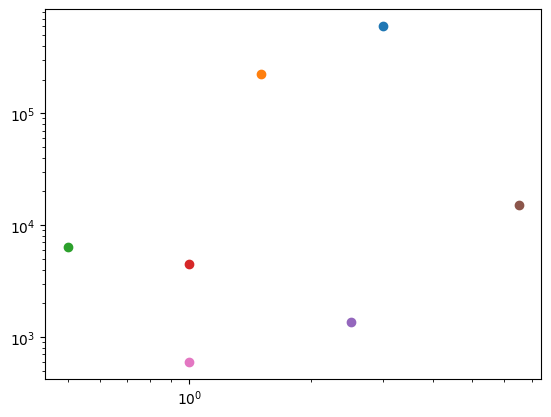

In [4]:
for g in geo:
    temp = g["temperature"]
    x1 = (temp["july"] + temp["january"])/2
    x2 = g["people"]
    plt.scatter(x1, x2)
    plt.loglog()

Возраст, время проводит, 

In [65]:
import scipy
import numpy as np
import math

In [94]:

mu = 3
puasson = lambda k: np.exp(-mu)*mu**(k)/(math.factorial(k)) 

age1 = 0
age2 = 10

t = [i*8 for i in range(age1, age2)]
age = [puasson(i) for i in range(age1, age2)]

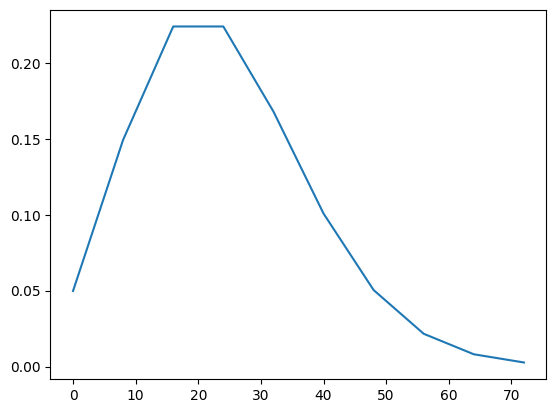

In [95]:

plt.plot(t, age)

In [96]:
rez_child = lambda ti: np.interp(ti, t, age)



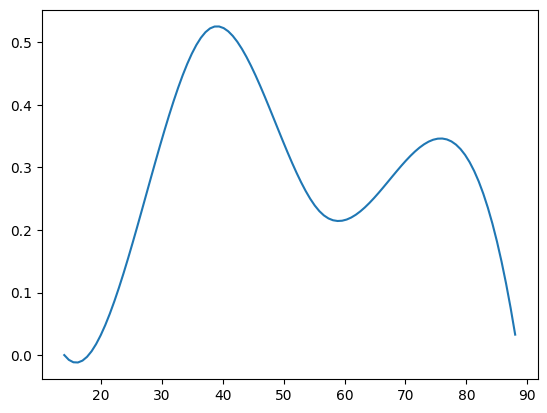

In [97]:
t_avto = np.array([14, 18, 38, 56, 60, 88])
age_avto = np.array([0, 0, 0.8, 0.35, 0.33, 0.05])
age_avto = age_avto/age_avto.sum()
rez_avto = scipy.interpolate.make_interp_spline(x= t_avto, y=age_avto, k=3)
t_avto = np.linspace(14, 88, 100)
plt.plot(t_avto, rez_avto(t_avto))

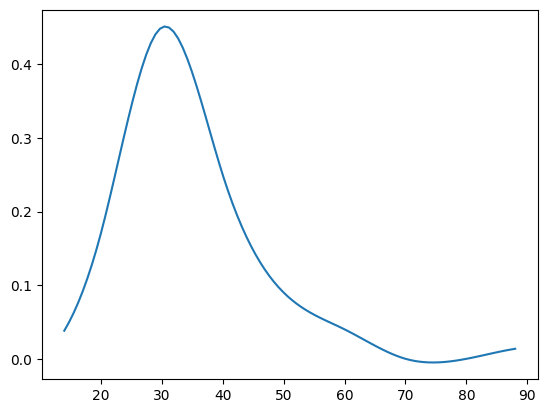

In [98]:
t_cosmetic = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 100])
age_cosmetic = np.array([0, 0, 17, 45, 25, 9, 4, 0, 0, 0])
age_cosmetic = age_cosmetic/age_cosmetic.sum()
rez_cosmetic = scipy.interpolate.make_interp_spline(x= t_cosmetic, y=age_cosmetic)
t_cosmetic = np.linspace(14, 88, 100)
plt.plot(t_cosmetic, rez_cosmetic(t_cosmetic))

In [99]:
names = [
    "Софья",
    "Мария",
    "Aнна",
    "Алиса",
    "Виктория",
    "Полина",
    "Ева",
    "Елизавета",
    "Александра",
    "Анастасия",
    "Варвара",
    "Дарья",
    "Ксения",
    "Вероника",
    "Екатерина",
    "Василиса",
    "Милана",
    "Кира",
    "Валерия",
    "Вера",
    "Мирослава"
]
lastnames = [
    "Смирнова",
    "Иванова",
    "Васильева",
    "Петрова",
    "Михайлова",
    "Федорова",
    "Кузнецова",
    "Попова",
    "Соколова",
    "Новикова",
    "Морозова",
    "Волкова",
    "Алексеева",
    "Лебедева",
    "Семенова",
    "Егорова"
]

In [100]:
list_index_name = [(i, j) for i in range(len(lastnames)) for j in range(len(names))]

In [101]:
np.random.shuffle(list_index_name)

In [102]:
users = [{"name": names[list_index_name[i][1]], "lastname": lastnames[list_index_name[i][0]]} for i in range(100)]

In [103]:
for i, user in enumerate(users):
    user["id"] = i

In [104]:
for user in users:
    user["age"] = np.random.randint(12, 61)

In [105]:
for user in users:
    rnd = (np.random.random()-0.5)*0.1 + rez_child(user["age"])
    user["child"] = 1 if rnd > 1 else 0 if rnd < 0 else rnd

    rnd = (np.random.random()-0.5)*0.1 + rez_avto(user["age"])
    user["avto"] = 1 if rnd > 1 else 0 if rnd < 0 else rnd

    rnd = (np.random.random()-0.5)*0.1 + rez_cosmetic(user["age"])
    user["cosmetic"] = 1 if rnd > 1 else 0 if rnd < 0 else rnd

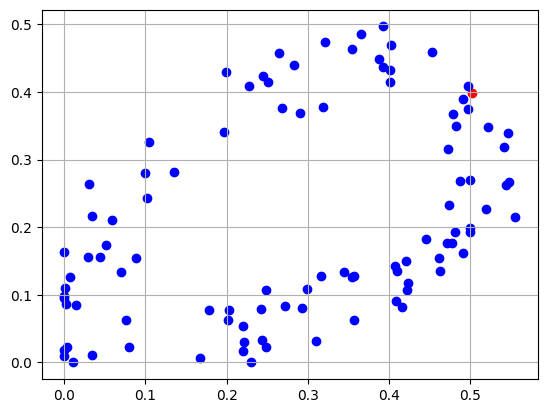

In [122]:
id_ = 10

for user in users:
    color = "r" if user["id"] == id_ else "b"
    plt.scatter(user["avto"], user["cosmetic"], color=color)

plt.grid()

In [107]:
def get_user_id(id_):
    for user in users:
        if user["id"] == id_:
            return user

def dist(user1, user2):
    dx1 = user1["avto"]-user2["avto"] 
    dx2 = user1["cosmetic"]-user2["cosmetic"]
    return np.sqrt(dx1**2+dx2**2)

def get_neighbor_users(id_, k=7):
    user1 = get_user_id(id_)
    ids = [user2["id"] for user2 in users] 
    dists = [dist(user1, user2) for user2 in users]
    
    index = np.argsort(dists)
    k_neighbors = [ids[i] for i in index[1:k+1]]
    return [get_user_id(id_n) for id_n in k_neighbors]

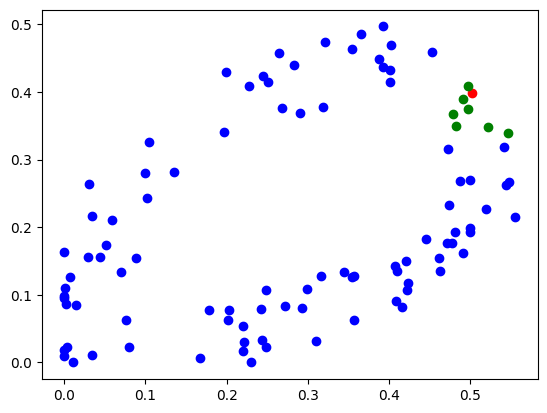

In [108]:
k_neighbor_users = get_neighbor_users(id_)
for user in users:
    if user["id"] == id_:
        color = "r"    
    elif user["id"] in [user["id"] for user in k_neighbor_users]:
        color = "g"
    else:
        color = "b"
    plt.scatter(user["avto"], user["cosmetic"], color=color)

In [109]:
def get_child(id_, k = 7):
    k_neighbor_users = get_neighbor_users(id_, k =k)
    child_args = [user["child"] for user in k_neighbor_users]
    return np.mean(child_args)

In [110]:
def test_child(id_, k=7):
    x1 = get_user_id(id_)["child"]
    x2 = get_child(id_, k=k)
    return abs(x1-x2)

In [114]:
x = []
y = []
for k in range(2, 20):
    rez = [test_child(i, k =k) for i in range(100)]
    r = np.max(rez)
    print(k, ':',r )
    x.append(k)
    y.append(r)

2 : 0.07452360133543923
3 : 0.07492479406569569
4 : 0.07175420958330896
5 : 0.07637916325016916
6 : 0.07234724223972579
7 : 0.0712664290090758
8 : 0.07056741062588676
9 : 0.07323025274388356
10 : 0.07322164643190038
11 : 0.07294489502635286
12 : 0.07289073325172206
13 : 0.07204244228999172
14 : 0.07182787937327634
15 : 0.06681053902869623
16 : 0.06582156050295657
17 : 0.06765543375598831
18 : 0.06625118991363928
19 : 0.06964008869384118


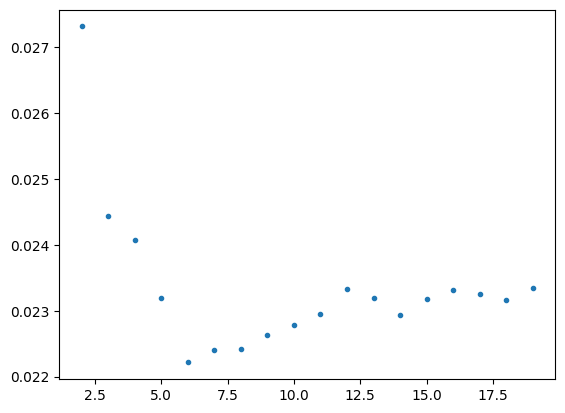

In [112]:
plt.plot(x, y,'.')

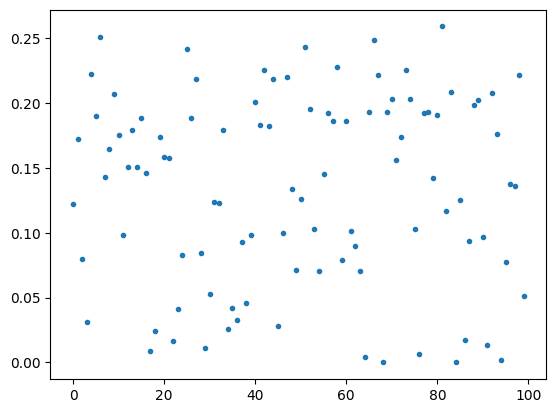

In [113]:
plt.plot([user["child"] for user in users], '.')

In [ ]:
детское кресло для машины
детскую коляску 
косметика


In [115]:
import json

In [118]:
with open("data.json", 'w') as f:
    json.dump({'users': users}, f)